In [1]:
import os
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 设备与参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""
model_name = "vit_base_patch16_224"

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 数据加载
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)

# 初始化ViT模型
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)

# 损失与优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# 训练 + 保存
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"[Epoch {epoch}/{num_epochs}] Loss: {running_loss:.4f}")

    if epoch % save_every == 0:
        torch.save(model.state_dict(), f"checkpointvit/vit_epoch{epoch}.pth")


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [3]:
import os
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm  # 引入 tqdm

# 设备与参数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 设置为你的数据路径，例如 "data/fish"
model_name = "vit_base_patch16_224"
model_dir = "checkpointvit"
os.makedirs(model_dir, exist_ok=True)

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# 数据加载
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)

# 初始化ViT模型
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)

# 损失与优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# 训练 + 保存
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0

    # 添加 tqdm 进度条
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"[Epoch {epoch}/{num_epochs}] Loss: {running_loss:.4f}")

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")


Epoch 1/30: 100%|███████████████████████████████████████| 275/275 [24:52<00:00,  5.43s/it, loss=2.8]


[Epoch 1/30] Loss: 820.9014


Epoch 2/30: 100%|██████████████████████████████████████| 275/275 [25:37<00:00,  5.59s/it, loss=2.07]


[Epoch 2/30] Loss: 582.2762


Epoch 3/30: 100%|██████████████████████████████████████| 275/275 [25:25<00:00,  5.55s/it, loss=1.99]


[Epoch 3/30] Loss: 453.7806


Epoch 4/30: 100%|██████████████████████████████████████| 275/275 [25:34<00:00,  5.58s/it, loss=1.61]


[Epoch 4/30] Loss: 364.0434


Epoch 5/30: 100%|██████████████████████████████████████| 275/275 [25:53<00:00,  5.65s/it, loss=1.28]


[Epoch 5/30] Loss: 297.0855
Saved model at checkpointvit\vit_epoch5.pth


Epoch 6/30: 100%|██████████████████████████████████████| 275/275 [25:58<00:00,  5.67s/it, loss=1.26]


[Epoch 6/30] Loss: 239.1939


Epoch 7/30: 100%|█████████████████████████████████████| 275/275 [25:33<00:00,  5.58s/it, loss=0.992]


[Epoch 7/30] Loss: 187.6678


Epoch 8/30: 100%|█████████████████████████████████████| 275/275 [25:57<00:00,  5.66s/it, loss=0.717]


[Epoch 8/30] Loss: 155.8868


Epoch 9/30: 100%|█████████████████████████████████████| 275/275 [26:00<00:00,  5.67s/it, loss=0.239]


[Epoch 9/30] Loss: 126.5198


Epoch 10/30: 100%|████████████████████████████████████| 275/275 [26:15<00:00,  5.73s/it, loss=0.333]


[Epoch 10/30] Loss: 97.7782
Saved model at checkpointvit\vit_epoch10.pth


Epoch 11/30: 100%|████████████████████████████████████| 275/275 [25:56<00:00,  5.66s/it, loss=0.216]


[Epoch 11/30] Loss: 83.7983


Epoch 12/30: 100%|████████████████████████████████████| 275/275 [25:42<00:00,  5.61s/it, loss=0.329]


[Epoch 12/30] Loss: 69.0536


Epoch 13/30: 100%|████████████████████████████████████| 275/275 [25:59<00:00,  5.67s/it, loss=0.175]


[Epoch 13/30] Loss: 65.9202


Epoch 14/30: 100%|████████████████████████████████████| 275/275 [26:07<00:00,  5.70s/it, loss=0.346]


[Epoch 14/30] Loss: 61.8298


Epoch 15/30: 100%|████████████████████████████████████| 275/275 [26:02<00:00,  5.68s/it, loss=0.174]


[Epoch 15/30] Loss: 43.0769
Saved model at checkpointvit\vit_epoch15.pth


Epoch 16/30: 100%|████████████████████████████████████| 275/275 [25:45<00:00,  5.62s/it, loss=0.634]


[Epoch 16/30] Loss: 57.5272


Epoch 17/30: 100%|███████████████████████████████████| 275/275 [25:53<00:00,  5.65s/it, loss=0.0558]


[Epoch 17/30] Loss: 40.9724


Epoch 18/30: 100%|████████████████████████████████████| 275/275 [26:01<00:00,  5.68s/it, loss=0.304]


[Epoch 18/30] Loss: 37.8134


Epoch 19/30: 100%|███████████████████████████████████| 275/275 [25:56<00:00,  5.66s/it, loss=0.0688]


[Epoch 19/30] Loss: 31.0175


Epoch 20/30: 100%|████████████████████████████████████| 275/275 [26:01<00:00,  5.68s/it, loss=0.045]


[Epoch 20/30] Loss: 41.1065
Saved model at checkpointvit\vit_epoch20.pth


Epoch 21/30: 100%|████████████████████████████████████| 275/275 [25:44<00:00,  5.62s/it, loss=0.209]


[Epoch 21/30] Loss: 32.6065


Epoch 22/30: 100%|████████████████████████████████████| 275/275 [25:50<00:00,  5.64s/it, loss=0.127]


[Epoch 22/30] Loss: 31.7269


Epoch 23/30: 100%|████████████████████████████████████| 275/275 [25:21<00:00,  5.53s/it, loss=0.163]


[Epoch 23/30] Loss: 32.6662


Epoch 24/30: 100%|███████████████████████████████████| 275/275 [25:50<00:00,  5.64s/it, loss=0.0171]


[Epoch 24/30] Loss: 36.0921


Epoch 25/30: 100%|████████████████████████████████████| 275/275 [26:07<00:00,  5.70s/it, loss=0.249]


[Epoch 25/30] Loss: 33.1790
Saved model at checkpointvit\vit_epoch25.pth


Epoch 26/30: 100%|███████████████████████████████████| 275/275 [25:40<00:00,  5.60s/it, loss=0.0474]


[Epoch 26/30] Loss: 30.6976


Epoch 27/30: 100%|████████████████████████████████████| 275/275 [26:01<00:00,  5.68s/it, loss=0.149]


[Epoch 27/30] Loss: 27.7887


Epoch 28/30: 100%|███████████████████████████████████| 275/275 [24:56<00:00,  5.44s/it, loss=0.0362]


[Epoch 28/30] Loss: 31.3118


Epoch 29/30: 100%|████████████████████████████████████| 275/275 [24:44<00:00,  5.40s/it, loss=0.126]


[Epoch 29/30] Loss: 23.6413


Epoch 30/30: 100%|████████████████████████████████████| 275/275 [22:59<00:00,  5.02s/it, loss=0.288]


[Epoch 30/30] Loss: 24.8942
Saved model at checkpointvit\vit_epoch30.pth


In [ ]:
import os
import re
import glob
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 参数配置 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 请修改为你的数据路径
model_name = "vit_base_patch16_224"
model_dir = "checkpointvitnew"
log_file = "vit-log.txt"
os.makedirs(model_dir, exist_ok=True)

# ==== 日志写入 ====
def write_log(msg, log_file=log_file):
    with open(log_file, "a") as f:
        f.write(msg + "\n")

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
num_classes = len(train_dataset.classes)

# ==== 创建 ViT 模型 ====
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# ==== 训练 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    avg_loss = total_loss / len(train_loader)
    acc = correct / total
    log_msg = f"Epoch [{epoch}/{num_epochs}] Complete - Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}"
    print(log_msg)
    write_log(log_msg)

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 验证模型准确率 ====
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, val_loader)
    filename = os.path.basename(path)
    epoch_num = int(re.search(r'epoch(\d+)', filename).group(1))
    write_log(f"vit_epoch{epoch_num}.pth - Test Accuracy: {acc:.4f}")

# ==== 日志解析 ====
def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []

    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"vit_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")

    with open(log_file, 'r') as f:
        for line in f:
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))
                if epoch == len(train_losses) + 1:
                    train_losses.append(loss)
                    train_accuracies.append(acc)

            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(acc)

    if test_accuracies:
        sorted_test = sorted(zip(test_epochs, test_accuracies))
        sorted_epochs, sorted_accs = zip(*sorted_test)
    else:
        sorted_epochs, sorted_accs = [], []

    return train_losses, train_accuracies, sorted_epochs, sorted_accs

# ==== 绘图 ====
train_losses, train_accuracies, test_epochs, test_accuracies = parse_log_file(log_file)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
if test_epochs:
    plt.plot(test_epochs, test_accuracies, marker='o', color='red')
    plt.title("Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
else:
    plt.title("Test Accuracy (No Data)")

plt.tight_layout()
plt.savefig("vit_training_test_curves.png")
plt.show()


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Found 6 models to evaluate:
 - vit_epoch5.pth
 - vit_epoch10.pth
 - vit_epoch15.pth
 - vit_epoch20.pth
 - vit_epoch25.pth
 - vit_epoch30.pth

=== Starting Evaluation ===


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:31<00:00,  1.75it/s]


Model vit_epoch5.pth - Test Accuracy: 0.7250


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:25<00:00,  2.14it/s]


Model vit_epoch10.pth - Test Accuracy: 0.8409


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:29<00:00,  1.87it/s]


Model vit_epoch15.pth - Test Accuracy: 0.8994


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:27<00:00,  2.03it/s]


Model vit_epoch20.pth - Test Accuracy: 0.9097


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:26<00:00,  2.07it/s]


Model vit_epoch25.pth - Test Accuracy: 0.8807


Testing: 100%|██████████████████████████████████████████████████████| 55/55 [00:25<00:00,  2.17it/s]


Model vit_epoch30.pth - Test Accuracy: 0.9045

=== Evaluation Summary ===
Epoch	Accuracy
-----------------
    5	0.7250
   10	0.8409
   15	0.8994
   20	0.9097
   25	0.8807
   30	0.9045

Best model: Epoch 20 with accuracy 0.9097

Accuracy curve saved as 'accuracy_curve.png'


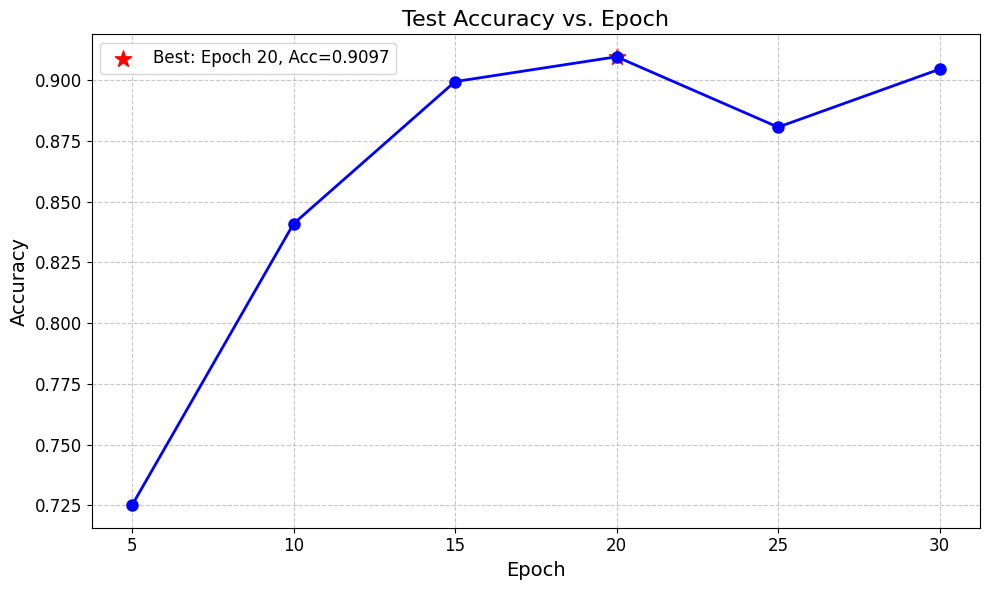

In [1]:
import os
import torch
import timm
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt  # 新增导入

def test_vit_models():
    # ==== 设置参数 ====
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    batch_size = 32
    data_dir = ""  # 设置为你的数据路径，与训练代码一致
    model_name = "vit_base_patch16_224"
    model_dir = "checkpointvit"
    
    # ==== 数据预处理 ====
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    
    # ==== 加载测试集 ====
    test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    num_classes = len(test_dataset.classes)
    
    # ==== 评估函数 ====
    def evaluate_model(model, loader):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in tqdm(loader, desc="Testing", ncols=100):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        return correct / total
    
    # ==== 获取所有保存的模型 ====
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]
    model_files.sort(key=lambda x: int(x.split('epoch')[1].split('.')[0]))  # 按epoch排序
    
    if not model_files:
        print(f"No model files found in {model_dir}")
        return
    
    print(f"\nFound {len(model_files)} models to evaluate:")
    for m in model_files:
        print(f" - {m}")
    
    # ==== 初始化模型结构 ====
    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
    model = model.to(device)
    
    # ==== 评估所有模型 ====
    results = []
    print("\n=== Starting Evaluation ===")
    
    for model_file in model_files:
        # 加载模型权重
        model_path = os.path.join(model_dir, model_file)
        model.load_state_dict(torch.load(model_path))
        
        # 提取epoch信息
        epoch = int(model_file.split('epoch')[1].split('.')[0])
        
        # 评估模型
        accuracy = evaluate_model(model, test_loader)
        results.append((epoch, accuracy))
        
        print(f"Model {model_file} - Test Accuracy: {accuracy:.4f}")
    
    # ==== 打印结果总结 ====
    print("\n=== Evaluation Summary ===")
    print("Epoch\tAccuracy")
    print("-----------------")
    for epoch, acc in sorted(results, key=lambda x: x[0]):
        print(f"{epoch:5d}\t{acc:.4f}")
    
    # 找出最佳模型
    best_epoch, best_acc = max(results, key=lambda x: x[1])
    print(f"\nBest model: Epoch {best_epoch} with accuracy {best_acc:.4f}")

    # ==== 绘制准确率曲线 ====  # 新增代码部分
    plt.figure(figsize=(10, 6))
    epochs, accuracies = zip(*sorted(results, key=lambda x: x[0]))
    plt.plot(epochs, accuracies, 'b-o', linewidth=2, markersize=8)
    plt.title('Test Accuracy vs. Epoch', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 标记最佳准确率点
    plt.scatter(best_epoch, best_acc, c='red', s=150, marker='*', 
                label=f'Best: Epoch {best_epoch}, Acc={best_acc:.4f}')
    plt.legend(fontsize=12)
    
    plt.xticks(epochs, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # 保存图像
    plt.savefig('accuracy_curve.png', dpi=300, bbox_inches='tight')
    print("\nAccuracy curve saved as 'accuracy_curve.png'")
    
    # 显示图像
    plt.show()

if __name__ == "__main__":
    test_vit_models()

十分之一模型训练

Epoch 1/30: 100%|████████████████████████████████████████| 28/28 [00:36<00:00,  1.29s/it, loss=2.84]


[Epoch 1/30] Loss: 3.4534, Train Accuracy: 0.1126, Val Accuracy: 0.1374


Epoch 2/30: 100%|████████████████████████████████████████| 28/28 [00:30<00:00,  1.08s/it, loss=3.52]


[Epoch 2/30] Loss: 3.2444, Train Accuracy: 0.1286, Val Accuracy: 0.1476


Epoch 3/30: 100%|████████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=2.83]


[Epoch 3/30] Loss: 3.1523, Train Accuracy: 0.1479, Val Accuracy: 0.1603


Epoch 4/30: 100%|████████████████████████████████████████| 28/28 [00:32<00:00,  1.16s/it, loss=3.09]


[Epoch 4/30] Loss: 3.0723, Train Accuracy: 0.1570, Val Accuracy: 0.1643


Epoch 5/30: 100%|████████████████████████████████████████| 28/28 [00:32<00:00,  1.16s/it, loss=3.02]


[Epoch 5/30] Loss: 2.9159, Train Accuracy: 0.1945, Val Accuracy: 0.1698
Saved model at checkpoint_VIT-1\vit_epoch5.pth


Epoch 6/30: 100%|████████████████████████████████████████| 28/28 [00:32<00:00,  1.16s/it, loss=2.75]


[Epoch 6/30] Loss: 2.8237, Train Accuracy: 0.2139, Val Accuracy: 0.2159


Epoch 7/30: 100%|████████████████████████████████████████| 28/28 [00:32<00:00,  1.16s/it, loss=3.31]


[Epoch 7/30] Loss: 2.7014, Train Accuracy: 0.2491, Val Accuracy: 0.2021


Epoch 8/30: 100%|████████████████████████████████████████| 28/28 [00:34<00:00,  1.21s/it, loss=3.08]


[Epoch 8/30] Loss: 2.5973, Train Accuracy: 0.2400, Val Accuracy: 0.1894


Epoch 9/30: 100%|████████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=2.45]


[Epoch 9/30] Loss: 2.4388, Train Accuracy: 0.2708, Val Accuracy: 0.2359


Epoch 10/30: 100%|████████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=1.5]


[Epoch 10/30] Loss: 2.3108, Train Accuracy: 0.3163, Val Accuracy: 0.3068
Saved model at checkpoint_VIT-1\vit_epoch10.pth


Epoch 11/30: 100%|███████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=2.05]


[Epoch 11/30] Loss: 1.9204, Train Accuracy: 0.4198, Val Accuracy: 0.3010


Epoch 12/30: 100%|███████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=1.71]


[Epoch 12/30] Loss: 1.7745, Train Accuracy: 0.4687, Val Accuracy: 0.3130


Epoch 13/30: 100%|████████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=1.3]


[Epoch 13/30] Loss: 1.5031, Train Accuracy: 0.5461, Val Accuracy: 0.2948


Epoch 14/30: 100%|███████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=1.51]


[Epoch 14/30] Loss: 1.4084, Train Accuracy: 0.5768, Val Accuracy: 0.3159


Epoch 15/30: 100%|███████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=1.26]


[Epoch 15/30] Loss: 1.1000, Train Accuracy: 0.6485, Val Accuracy: 0.3352
Saved model at checkpoint_VIT-1\vit_epoch15.pth


Epoch 16/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.851]


[Epoch 16/30] Loss: 0.9789, Train Accuracy: 0.6997, Val Accuracy: 0.3911


Epoch 17/30: 100%|██████████████████████████████████████| 28/28 [00:32<00:00,  1.18s/it, loss=0.591]


[Epoch 17/30] Loss: 0.6065, Train Accuracy: 0.7918, Val Accuracy: 0.3879


Epoch 18/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.728]


[Epoch 18/30] Loss: 0.5876, Train Accuracy: 0.8146, Val Accuracy: 0.3889


Epoch 19/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.21s/it, loss=0.899]


[Epoch 19/30] Loss: 0.6631, Train Accuracy: 0.7827, Val Accuracy: 0.3599


Epoch 20/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.504]


[Epoch 20/30] Loss: 0.4545, Train Accuracy: 0.8658, Val Accuracy: 0.4024
Saved model at checkpoint_VIT-1\vit_epoch20.pth


Epoch 21/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.357]


[Epoch 21/30] Loss: 0.2598, Train Accuracy: 0.9204, Val Accuracy: 0.3788


Epoch 22/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=0.165]


[Epoch 22/30] Loss: 0.3498, Train Accuracy: 0.8874, Val Accuracy: 0.3748


Epoch 23/30: 100%|█████████████████████████████████████| 28/28 [00:33<00:00,  1.18s/it, loss=0.0476]


[Epoch 23/30] Loss: 0.2208, Train Accuracy: 0.9238, Val Accuracy: 0.4057


Epoch 24/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=0.359]


[Epoch 24/30] Loss: 0.1825, Train Accuracy: 0.9454, Val Accuracy: 0.3937


Epoch 25/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.20s/it, loss=0.274]


[Epoch 25/30] Loss: 0.2375, Train Accuracy: 0.9170, Val Accuracy: 0.4046
Saved model at checkpoint_VIT-1\vit_epoch25.pth


Epoch 26/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.18s/it, loss=0.641]


[Epoch 26/30] Loss: 0.2855, Train Accuracy: 0.9170, Val Accuracy: 0.4140


Epoch 27/30: 100%|██████████████████████████████████████| 28/28 [00:32<00:00,  1.17s/it, loss=0.212]


[Epoch 27/30] Loss: 0.1632, Train Accuracy: 0.9431, Val Accuracy: 0.3820


Epoch 28/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.222]


[Epoch 28/30] Loss: 0.1589, Train Accuracy: 0.9511, Val Accuracy: 0.4031


Epoch 29/30: 100%|█████████████████████████████████████| 28/28 [00:33<00:00,  1.18s/it, loss=0.0861]


[Epoch 29/30] Loss: 0.1485, Train Accuracy: 0.9477, Val Accuracy: 0.4209


Epoch 30/30: 100%|██████████████████████████████████████| 28/28 [00:33<00:00,  1.19s/it, loss=0.247]


[Epoch 30/30] Loss: 0.1624, Train Accuracy: 0.9488, Val Accuracy: 0.4209
Saved model at checkpoint_VIT-1\vit_epoch30.pth


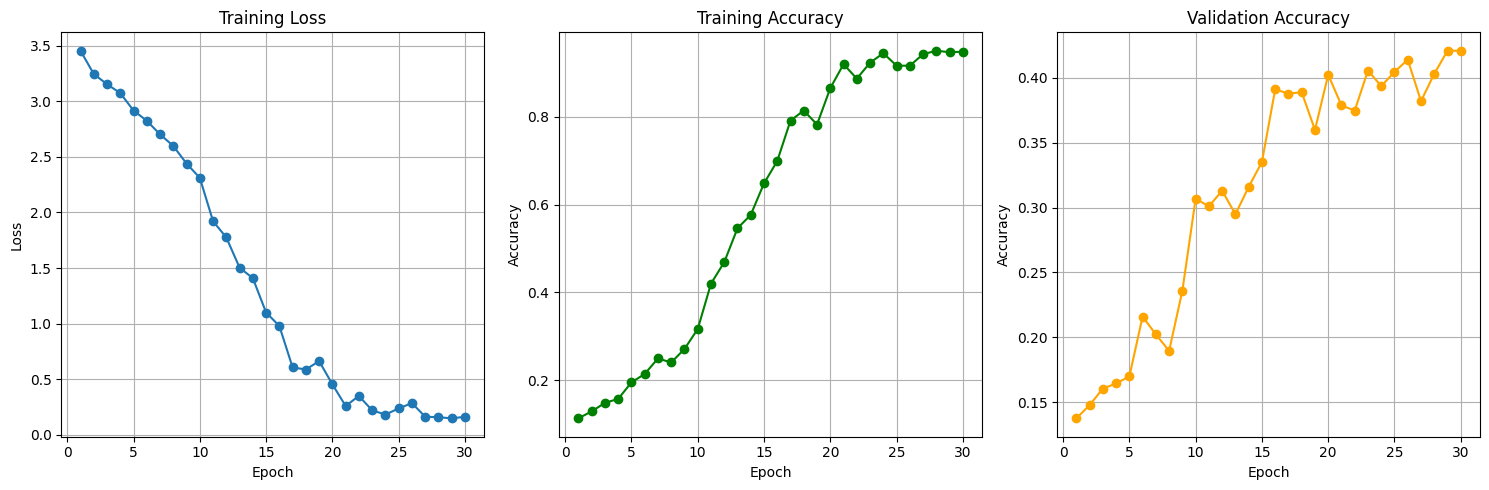


=== Evaluating All Saved Models ===

vit_epoch10.pth - Val Accuracy: 0.3068, Test Accuracy: 0.3165
vit_epoch15.pth - Val Accuracy: 0.3352, Test Accuracy: 0.3312
vit_epoch20.pth - Val Accuracy: 0.4024, Test Accuracy: 0.4119
vit_epoch25.pth - Val Accuracy: 0.4046, Test Accuracy: 0.4102
vit_epoch30.pth - Val Accuracy: 0.4209, Test Accuracy: 0.4176
vit_epoch5.pth - Val Accuracy: 0.1698, Test Accuracy: 0.1659

✅ Best Model: checkpoint_VIT-1\vit_epoch30.pth (Epoch 30)


AttributeError: '_IncompatibleKeys' object has no attribute 'eval'

In [2]:
import os
import glob
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 设备与参数设置 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 填写你的数据路径
model_name = "vit_base_patch16_224"
model_dir = "checkpoint_VIT-1"
os.makedirs(model_dir, exist_ok=True)

# ==== 图像预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ==== 加载完整训练集并提取标签 ====
full_train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
targets = full_train_dataset.targets

# ==== 分层抽样，保留每类 10% 样本 ====
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=42)
for train_idx, _ in sss.split(torch.zeros(len(targets)), targets):
    reduced_train_dataset = Subset(full_train_dataset, train_idx)

train_loader = DataLoader(reduced_train_dataset, batch_size=batch_size, shuffle=True)

# ==== 加载验证集与测试集 ====
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ==== 类别数 ====
num_classes = len(full_train_dataset.classes)

# ==== 初始化 ViT 模型 ====
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)

# ==== 损失函数与优化器 ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# ==== 准确率评估函数 ====
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 记录训练过程 ====
train_losses = []
train_accuracies = []
val_accuracies = []

# ==== 训练循环 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader)
    train_acc = correct / total
    val_acc = evaluate_accuracy(model, val_loader)

    train_losses.append(epoch_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"[Epoch {epoch}/{num_epochs}] Loss: {epoch_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 绘制训练过程曲线 ====
plt.figure(figsize=(15, 5))

# Loss 曲线
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# 训练准确率曲线
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# 验证准确率曲线
plt.subplot(1, 3, 3)
plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', color='orange')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("train_val_curves_vit.png")
plt.show()

# ==== 评估所有保存的模型 ====
print("\n=== Evaluating All Saved Models ===\n")

# 重新初始化一个新的ViT模型（防止污染）
model_eval = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
model_eval = model_eval.to(device)

# 找到所有保存的.pth文件
model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

best_model = None
best_test_acc = 0
best_epoch = 0

for path in model_paths:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    
    # 评估验证集准确率
    val_acc = evaluate_accuracy(model_eval, val_loader)
    # 评估测试集准确率
    test_acc = evaluate_accuracy(model_eval, test_loader)
    
    print(f"{os.path.basename(path)} - Val Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model = path
        best_epoch = int(path.split("_epoch")[1].split(".pth")[0])

# 输出最佳模型信息
print(f"\n✅ Best Model: {best_model} (Epoch {best_epoch})")
print(f"Validation Accuracy: {evaluate_accuracy(model_eval.load_state_dict(torch.load(best_model, map_location=device)), val_loader):.4f}")
print(f"Test Accuracy: {best_test_acc:.4f}")

增强之后的训练模型

C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch 1/30: 100%|███████████████████████████| 138/138 [01:56<00:00,  1.18it/s, acc=0.153, loss=2.54]


[Epoch 1/30] Loss: 3.1535, Train Acc: 0.1531, Val Acc: 0.1930


Epoch 2/30: 100%|███████████████████████████| 138/138 [02:07<00:00,  1.08it/s, acc=0.269, loss=2.11]


[Epoch 2/30] Loss: 2.5869, Train Acc: 0.2687, Val Acc: 0.2683


Epoch 3/30: 100%|███████████████████████████| 138/138 [02:13<00:00,  1.04it/s, acc=0.423, loss=1.62]


[Epoch 3/30] Loss: 1.9796, Train Acc: 0.4234, Val Acc: 0.3715


Epoch 4/30: 100%|██████████████████████████| 138/138 [02:04<00:00,  1.11it/s, acc=0.605, loss=0.771]


[Epoch 4/30] Loss: 1.2762, Train Acc: 0.6046, Val Acc: 0.3948


Epoch 5/30: 100%|██████████████████████████| 138/138 [02:05<00:00,  1.10it/s, acc=0.765, loss=0.642]


[Epoch 5/30] Loss: 0.7526, Train Acc: 0.7645, Val Acc: 0.4231
Saved model at checkpoint_improve_vit\vit_epoch5.pth


Epoch 6/30: 100%|█████████████████████████| 138/138 [02:03<00:00,  1.12it/s, acc=0.862, loss=0.0622]


[Epoch 6/30] Loss: 0.4433, Train Acc: 0.8617, Val Acc: 0.4264


Epoch 7/30: 100%|██████████████████████████| 138/138 [02:05<00:00,  1.10it/s, acc=0.911, loss=0.487]


[Epoch 7/30] Loss: 0.2891, Train Acc: 0.9110, Val Acc: 0.4362


Epoch 8/30: 100%|██████████████████████████| 138/138 [02:06<00:00,  1.09it/s, acc=0.925, loss=0.186]


[Epoch 8/30] Loss: 0.2461, Train Acc: 0.9251, Val Acc: 0.4482


Epoch 9/30: 100%|███████████████████████████| 138/138 [02:10<00:00,  1.06it/s, acc=0.941, loss=0.55]


[Epoch 9/30] Loss: 0.1957, Train Acc: 0.9413, Val Acc: 0.4406


Epoch 10/30: 100%|████████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.946, loss=0.0101]


[Epoch 10/30] Loss: 0.1718, Train Acc: 0.9461, Val Acc: 0.4351
Saved model at checkpoint_improve_vit\vit_epoch10.pth


Epoch 11/30: 100%|█████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.963, loss=0.223]


[Epoch 11/30] Loss: 0.1331, Train Acc: 0.9627, Val Acc: 0.4500


Epoch 12/30: 100%|████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.967, loss=0.0174]


[Epoch 12/30] Loss: 0.1141, Train Acc: 0.9668, Val Acc: 0.4442


Epoch 13/30: 100%|█████████████████████████| 138/138 [02:10<00:00,  1.06it/s, acc=0.976, loss=0.251]


[Epoch 13/30] Loss: 0.0926, Train Acc: 0.9761, Val Acc: 0.4395


Epoch 14/30: 100%|█████████████████████████| 138/138 [02:10<00:00,  1.06it/s, acc=0.951, loss=0.346]


[Epoch 14/30] Loss: 0.1724, Train Acc: 0.9506, Val Acc: 0.4406


Epoch 15/30: 100%|████████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.962, loss=0.0026]


[Epoch 15/30] Loss: 0.1386, Train Acc: 0.9625, Val Acc: 0.4497
Saved model at checkpoint_improve_vit\vit_epoch15.pth


Epoch 16/30: 100%|█████████████████████████| 138/138 [02:10<00:00,  1.06it/s, acc=0.97, loss=0.0715]


[Epoch 16/30] Loss: 0.0994, Train Acc: 0.9702, Val Acc: 0.4453


Epoch 17/30: 100%|███████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.967, loss=0.00734]


[Epoch 17/30] Loss: 0.1226, Train Acc: 0.9666, Val Acc: 0.4555


Epoch 18/30: 100%|██████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.986, loss=0.000331]


[Epoch 18/30] Loss: 0.0511, Train Acc: 0.9863, Val Acc: 0.4540


Epoch 19/30: 100%|████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.976, loss=0.0125]


[Epoch 19/30] Loss: 0.0801, Train Acc: 0.9761, Val Acc: 0.4402


Epoch 20/30: 100%|█████████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.973, loss=0.339]


[Epoch 20/30] Loss: 0.0885, Train Acc: 0.9734, Val Acc: 0.4293
Saved model at checkpoint_improve_vit\vit_epoch20.pth


Epoch 21/30: 100%|███████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.959, loss=0.00682]


[Epoch 21/30] Loss: 0.1391, Train Acc: 0.9595, Val Acc: 0.4587


Epoch 22/30: 100%|████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.982, loss=0.0128]


[Epoch 22/30] Loss: 0.0559, Train Acc: 0.9816, Val Acc: 0.4322


Epoch 23/30: 100%|█████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.98, loss=0.0105]


[Epoch 23/30] Loss: 0.0723, Train Acc: 0.9800, Val Acc: 0.4504


Epoch 24/30: 100%|██████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.98, loss=0.011]


[Epoch 24/30] Loss: 0.0680, Train Acc: 0.9804, Val Acc: 0.4184


Epoch 25/30: 100%|█████████████████████████| 138/138 [02:10<00:00,  1.06it/s, acc=0.985, loss=0.012]


[Epoch 25/30] Loss: 0.0542, Train Acc: 0.9848, Val Acc: 0.4635
Saved model at checkpoint_improve_vit\vit_epoch25.pth


Epoch 26/30: 100%|███████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.989, loss=0.00121]


[Epoch 26/30] Loss: 0.0365, Train Acc: 0.9891, Val Acc: 0.4457


Epoch 27/30: 100%|█████████████████████████| 138/138 [02:09<00:00,  1.06it/s, acc=0.98, loss=0.0218]


[Epoch 27/30] Loss: 0.0726, Train Acc: 0.9795, Val Acc: 0.4464


Epoch 28/30: 100%|█████████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.98, loss=0.0647]


[Epoch 28/30] Loss: 0.0711, Train Acc: 0.9804, Val Acc: 0.4119


Epoch 29/30: 100%|█████████████████████████| 138/138 [02:08<00:00,  1.07it/s, acc=0.974, loss=0.031]


[Epoch 29/30] Loss: 0.0971, Train Acc: 0.9736, Val Acc: 0.4406


Epoch 30/30: 100%|███████████████████████| 138/138 [02:09<00:00,  1.07it/s, acc=0.979, loss=0.00176]


[Epoch 30/30] Loss: 0.0791, Train Acc: 0.9791, Val Acc: 0.4406
Saved model at checkpoint_improve_vit\vit_epoch30.pth


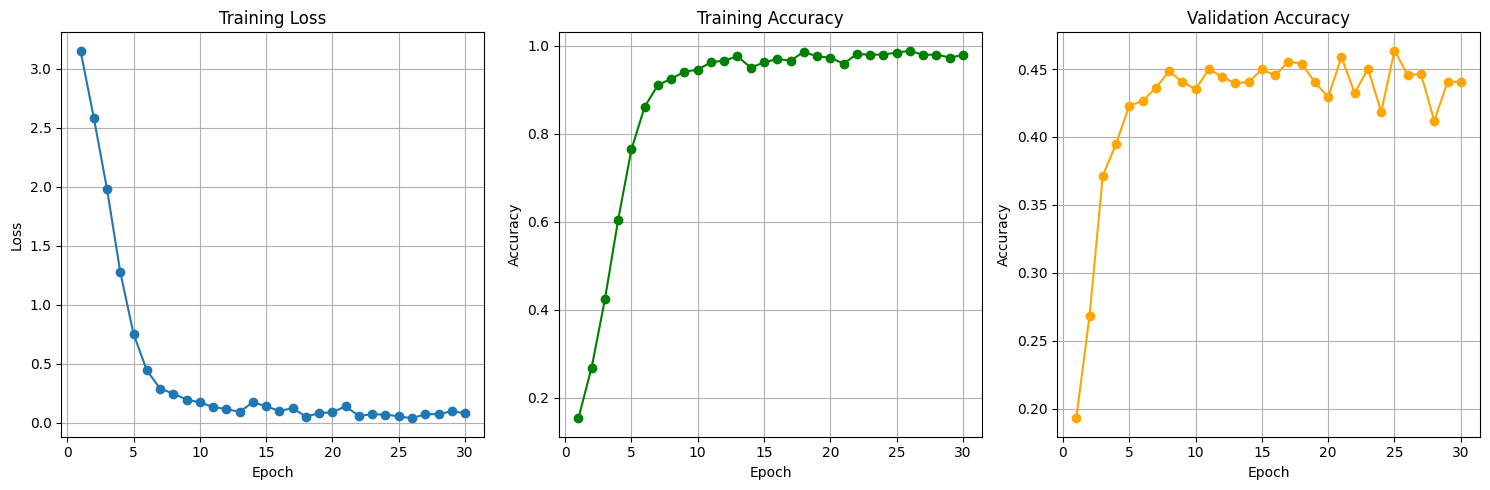


=== Evaluating All Saved Models on Test Set ===
Epoch 10: Test Accuracy = 0.4284
Epoch 15: Test Accuracy = 0.4381
Epoch 20: Test Accuracy = 0.4261
Epoch 25: Test Accuracy = 0.4443
Epoch 30: Test Accuracy = 0.4443
Epoch 5: Test Accuracy = 0.4153

✅ Best Model: Epoch 25
Test Accuracy: 0.4443


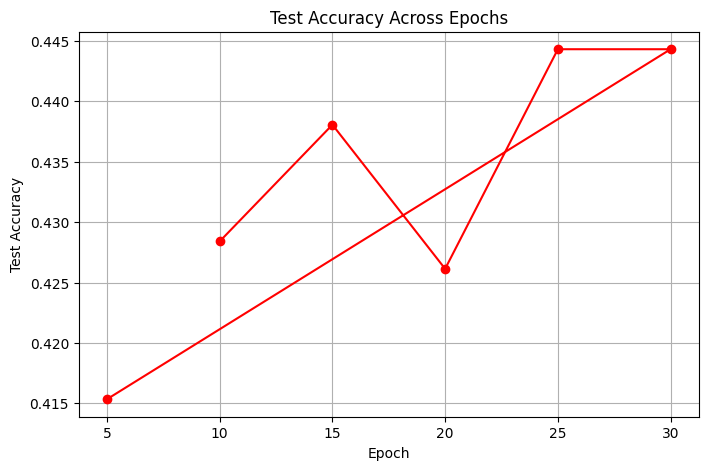

In [1]:
import os
import glob
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 设备与参数设置 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 设置为你的数据路径，例如 "data/fish"
model_name = "vit_base_patch16_224"
model_dir = "checkpoint_improve_vit"
os.makedirs(model_dir, exist_ok=True)

# ==== 图像预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ==== 数据加载 ====
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train_improve-2"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

num_classes = len(train_dataset.classes)

# ==== 初始化ViT模型 ====
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
model = model.to(device)

# ==== 损失函数与优化器 ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# ==== 准确率评估函数 ====
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 训练记录 ====
train_losses = []
train_accuracies = []
val_accuracies = []

# ==== 训练循环 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        progress_bar.set_postfix(loss=loss.item(), acc=correct/total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    val_acc = evaluate_accuracy(model, val_loader)
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    val_accuracies.append(val_acc)

    print(f"[Epoch {epoch}/{num_epochs}] Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Acc: {val_acc:.4f}")

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 绘制训练曲线 ====
plt.figure(figsize=(15, 5))

# 训练损失曲线
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# 训练准确率曲线
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

# 验证准确率曲线
plt.subplot(1, 3, 3)
plt.plot(range(1, num_epochs+1), val_accuracies, marker='o', color='orange')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("training_curves.png")
plt.show()

# ==== 评估所有保存的模型 ====
print("\n=== Evaluating All Saved Models on Test Set ===")

# 重新初始化模型用于评估
model_eval = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
model_eval = model_eval.to(device)

# 获取所有保存的模型路径
model_paths = sorted(glob.glob(os.path.join(model_dir, "*.pth")))

best_model = None
best_test_acc = 0
best_epoch = 0
test_accuracies = []

for path in model_paths:
    model_eval.load_state_dict(torch.load(path, map_location=device))
    
    # 在测试集上评估
    test_acc = evaluate_accuracy(model_eval, test_loader)
    test_accuracies.append(test_acc)
    
    # 获取epoch数
    epoch_num = int(path.split("_epoch")[1].split(".pth")[0])
    
    print(f"Epoch {epoch_num}: Test Accuracy = {test_acc:.4f}")
    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model = path
        best_epoch = epoch_num

# ==== 输出最佳模型结果 ====
print(f"\n✅ Best Model: Epoch {best_epoch}")
print(f"Test Accuracy: {best_test_acc:.4f}")

# ==== 绘制测试准确率曲线 ====
epoch_numbers = [int(p.split("_epoch")[1].split(".pth")[0]) for p in model_paths]

plt.figure(figsize=(8, 5))
plt.plot(epoch_numbers, test_accuracies, marker='o', color='red')
plt.title("Test Accuracy Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.savefig("test_accuracy_curve.png")
plt.show()

多种增强，十分之一后的模型

In [1]:
import os
import re
import glob
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==== 参数配置 ====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 30
save_every = 5
data_dir = ""  # 你的数据路径
model_name = "vit_base_patch16_224"
model_dir = "check_improve_nogs_vit"
log_file = "vit-log.txt"
os.makedirs(model_dir, exist_ok=True)

# ==== 日志写入 ====
def write_log(msg, log_file=log_file):
    with open(log_file, "a") as f:
        f.write(msg + "\n")

# ==== 数据预处理 ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train_improve-3"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
num_classes = len(train_dataset.classes)  # 应该是31

# ==== 创建 ViT 模型并加载本地权重 ====
model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)

# 加载本地预训练权重（排除分类头）
model_path = "pytorch_model.bin"
state_dict = torch.load(model_path, map_location=device)

# 去除不匹配的分类头权重
filtered_dict = {k: v for k, v in state_dict.items() if not k.startswith("head.")}
missing, unexpected = model.load_state_dict(filtered_dict, strict=False)
print(f"Loaded pretrained weights (excluding head). Missing: {missing}, Unexpected: {unexpected}")

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# ==== 训练 ====
for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", ncols=100)

    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

    avg_loss = total_loss / len(train_loader)
    acc = correct / total
    log_msg = f"Epoch [{epoch}/{num_epochs}] Complete - Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}"
    print(log_msg)
    write_log(log_msg)

    if epoch % save_every == 0:
        save_path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
        torch.save(model.state_dict(), save_path)
        print(f"Saved model at {save_path}")

# ==== 验证模型准确率 ====
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

write_log("=== Evaluating Saved Models ===")
pth_files = sorted(glob.glob(os.path.join(model_dir, "*.pth")))
for path in pth_files:
    model.load_state_dict(torch.load(path))
    acc = evaluate_model(model, val_loader)
    filename = os.path.basename(path)
    epoch_num = int(re.search(r'epoch(\d+)', filename).group(1))
    write_log(f"vit_epoch{epoch_num}.pth - Test Accuracy: {acc:.4f}")

# ==== 日志解析 ====
def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []

    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"vit_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")

    with open(log_file, 'r') as f:
        for line in f:
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))
                if epoch == len(train_losses) + 1:
                    train_losses.append(loss)
                    train_accuracies.append(acc)

            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(acc)

    if test_accuracies:
        sorted_test = sorted(zip(test_epochs, test_accuracies))
        sorted_epochs, sorted_accs = zip(*sorted_test)
    else:
        sorted_epochs, sorted_accs = [], []

    return train_losses, train_accuracies, sorted_epochs, sorted_accs

# ==== 绘图 ====
train_losses, train_accuracies, test_epochs, test_accuracies = parse_log_file(log_file)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
if test_epochs:
    plt.plot(test_epochs, test_accuracies, marker='o', color='red')
    plt.title("Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
else:
    plt.title("Test Accuracy (No Data)")

plt.tight_layout()
plt.savefig("vit_training_test_curves.png")
plt.show()


C:\Users\30419\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Epoch 1/30:   3%|▊                            | 7/248 [00:08<04:35,  1.14s/it, acc=0.067, loss=3.25]


KeyboardInterrupt: 

Model vit_epoch10.pth - Test Accuracy: 0.4568
Model vit_epoch15.pth - Test Accuracy: 0.4994
Model vit_epoch20.pth - Test Accuracy: 0.4631
Model vit_epoch25.pth - Test Accuracy: 0.4994
Model vit_epoch30.pth - Test Accuracy: 0.4750
Model vit_epoch5.pth - Test Accuracy: 0.4830


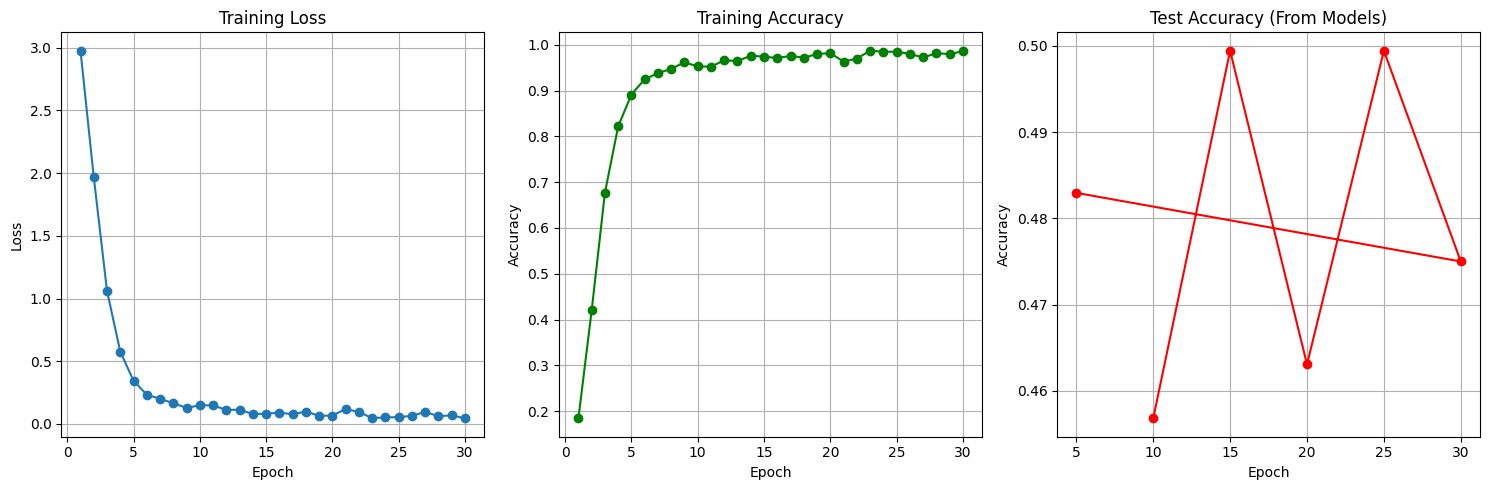

In [ ]:
import os
import re
import glob
import torch
import timm
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 参数 ====
log_file = "log_improve_nogs_vit.txt"
model_dir = "check_improve_nogs_vit"
model_name = "vit_base_patch16_224"
data_dir = ""  # 设置你的数据集路径
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32

# ==== 数据加载（测试集） ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
num_classes = len(test_dataset.classes)

# ==== 日志解析函数 ====
def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []

    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"vit_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")

    with open(log_file, 'r') as f:
        for line in f:
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))
                train_losses.append(loss)
                train_accuracies.append(acc)

            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(acc)

    if test_epochs:
        sorted_test = sorted(zip(test_epochs, test_accuracies))
        test_epochs, test_accuracies = zip(*sorted_test)
    else:
        test_epochs, test_accuracies = [], []

    return train_losses, train_accuracies, test_epochs, test_accuracies

# ==== 模型评估函数 ====
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 日志分析 ====
train_losses, train_accuracies, test_epochs_log, test_accuracies_log = parse_log_file(log_file)

# ==== 模型评估 ====
pth_files = sorted(glob.glob(os.path.join(model_dir, "vit_epoch*.pth")))
eval_epochs = []
eval_accuracies = []

for path in pth_files:
    epoch_match = re.search(r"epoch(\d+)", os.path.basename(path))
    if not epoch_match:
        continue
    epoch = int(epoch_match.group(1))

    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(path, map_location=device))
    model = model.to(device)

    acc = evaluate_model(model, test_loader)
    eval_epochs.append(epoch)
    eval_accuracies.append(acc)
    print(f"Model vit_epoch{epoch}.pth - Test Accuracy: {acc:.4f}")

# ==== 绘图 ====
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(eval_epochs, eval_accuracies, marker='o', color='red')
plt.title("Test Accuracy (From Models)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("vit_revised_training_test_curves.png")
plt.show()


Model vit_epoch5.pth - Test Accuracy: 0.4830
Model vit_epoch10.pth - Test Accuracy: 0.4568
Model vit_epoch15.pth - Test Accuracy: 0.4994
Model vit_epoch20.pth - Test Accuracy: 0.4631
Model vit_epoch25.pth - Test Accuracy: 0.4994
Model vit_epoch30.pth - Test Accuracy: 0.4750


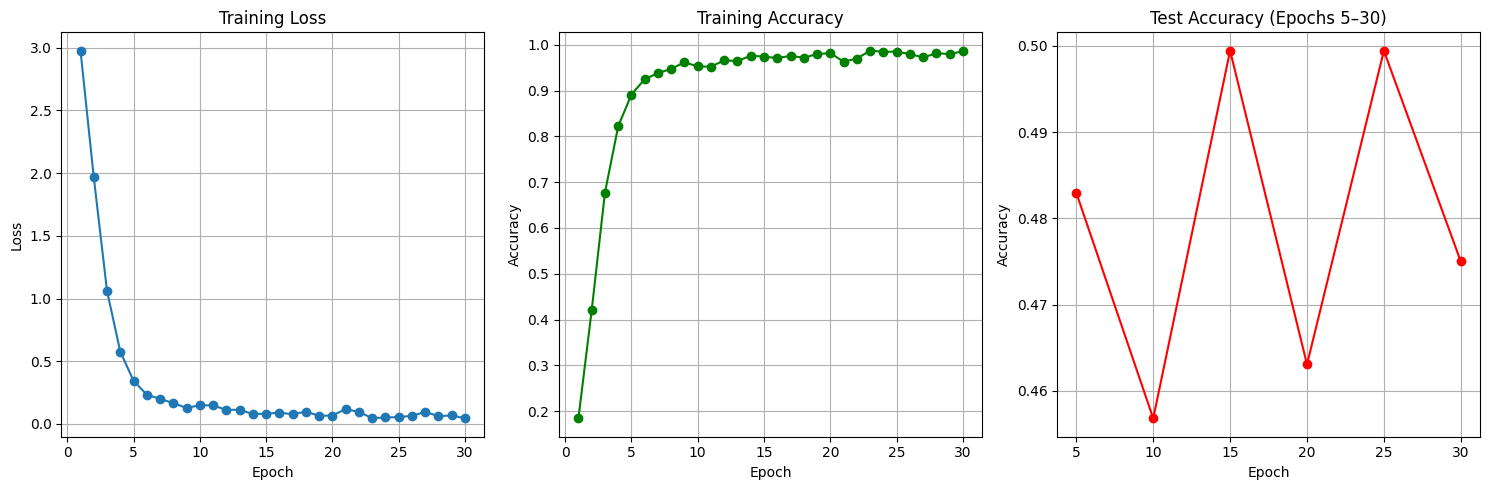

In [4]:
import os
import re
import glob
import torch
import timm
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ==== 参数 ====
log_file = "log_improve_nogs_vit.txt"
model_dir = "check_improve_nogs_vit"
model_name = "vit_base_patch16_224"
data_dir = ""  # 设置你的数据集路径
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
target_epochs = [5, 10, 15, 20, 25, 30]  # 只评估这些epoch的模型

# ==== 数据加载（测试集） ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
num_classes = len(test_dataset.classes)

# ==== 日志解析函数 ====
def parse_log_file(log_file):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    test_epochs = []

    train_pattern = re.compile(r"Epoch \[(\d+)/\d+\] Complete - Loss: (\d+\.\d+), Accuracy: (\d+\.\d+)")
    test_pattern = re.compile(r"vit_epoch(\d+)\.pth - Test Accuracy: (\d+\.\d+)")

    with open(log_file, 'r') as f:
        for line in f:
            train_match = train_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                acc = float(train_match.group(3))
                train_losses.append(loss)
                train_accuracies.append(acc)

            test_match = test_pattern.search(line)
            if test_match:
                epoch = int(test_match.group(1))
                acc = float(test_match.group(2))
                test_epochs.append(epoch)
                test_accuracies.append(acc)

    if test_epochs:
        sorted_test = sorted(zip(test_epochs, test_accuracies))
        test_epochs, test_accuracies = zip(*sorted_test)
    else:
        test_epochs, test_accuracies = [], []

    return train_losses, train_accuracies, test_epochs, test_accuracies

# ==== 模型评估函数 ====
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# ==== 日志分析 ====
train_losses, train_accuracies, test_epochs_log, test_accuracies_log = parse_log_file(log_file)

# ==== 模型评估（指定 epoch） ====
eval_epochs = []
eval_accuracies = []

for epoch in target_epochs:
    path = os.path.join(model_dir, f"vit_epoch{epoch}.pth")
    if not os.path.exists(path):
        print(f"[Warning] Model file not found: {path}")
        continue

    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(path, map_location=device))
    model = model.to(device)

    acc = evaluate_model(model, test_loader)
    eval_epochs.append(epoch)
    eval_accuracies.append(acc)
    print(f"Model vit_epoch{epoch}.pth - Test Accuracy: {acc:.4f}")

# ==== 绘图 ====
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(eval_epochs, eval_accuracies, marker='o', color='red')
plt.title("Test Accuracy (Epochs 5–30)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.savefig("vit_selected_epochs_test_curve.png")
plt.show()
